In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

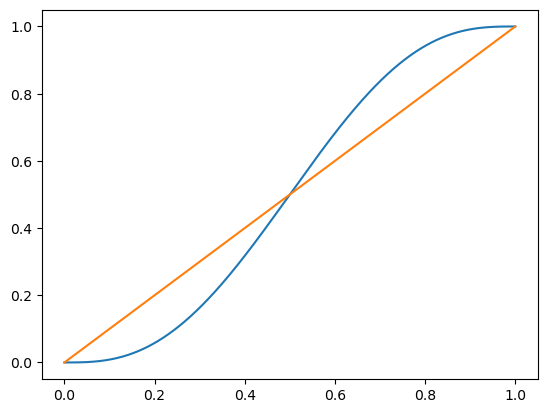

In [3]:
_scalartypes = (int, float, np.int64, np.int32, np.float64)


def isscalar(x) -> bool:
    """Check if parameter is scalar number

    Parameters
    ----------
    x : any
        value to check

    Returns
    -------
    bool
        True if x is int or real  
    """
    return isinstance(x, _scalartypes) or (isinstance(x, np.ndarray) and (x.size==1))

def vector(x, dim=None):
    """Return a vector

    Parameters
    ----------
    x : array-like
        values to be transformed to vector
    dim : int
        required dimension; None: no length check

    Returns
    -------
    ndarray
        array in specified format
    """
    if isinstance(x, (list, tuple)):
        x = np.asarray(x)
    elif isscalar(x):
        x = np.asarray(x)
    elif isinstance(x, np.ndarray):
        x = x.flatten()
    else:
        raise TypeError("Invalid input type")
    if (dim is not None) and x.size != dim:
        raise ValueError("Incorrect vector length")
    return x

def jpoly(q0, q1, t, qd0=None, qd1=None):
    """Trajectory from q0 to q1 using 5th order polynomial

    Parameters
    ----------
    q0 : array of floats
        initial joint positions (n,)
    q1 : array of floats
        final joint position (n,)
    t : array of floats
        trajectory time (nsamp,)
    qd0 : array of floats
        Initial joint velocities (n,)
    qd1 : array of floats
        Final joint velocities (n,)

    Returns
    -------
    array of floats
        interpolated joint position (nsamp, n)
    array of floats
        interpolated joint velocities  (nsamp, n)
    array of floats
        interpolated joint accelerations  (nsamp, n)
    """
    q0 = vector(q0)
    q1 = vector(q1)
    if qd0 is None:
        qd0 = np.zeros(q0.shape)
    else:
        qd0 = vector(qd0)
    if qd1 is None:
        qd1 = np.zeros(q0.shape)
    else:
        qd1 = vector(qd1)
    if q0.size==q1.size and qd0.size==q0.size and qd1.size==q1.size:
        tmax = max(t)
        t = np.copy(vector(t).T)/tmax

        A =   6*(q1-q0)-3*(qd1+qd0)*tmax
        B = -15*(q1-q0)+(8*qd0+7*qd1)*tmax
        C =  10*(q1-q0)-(6*qd0+4*qd1)*tmax
        E = qd0*tmax
        F = q0
  
        tt = np.array([t**5, t**4, t**3, t**2, t, np.ones(t.shape)])
        s = np.array([A, B, C, np.zeros(A.shape), E, F]).reshape((6,q0.size))
        v = np.array([np.zeros(A.shape), 5 * A, 4 * B, 3 * C, np.zeros(A.shape), E]).reshape((6,q0.size))/tmax
        a = np.array([np.zeros(A.shape), np.zeros(A.shape), 20 * A, 12 * B, 6 * C, np.zeros(A.shape)]).reshape((6,q0.size))/tmax**2
        qt = np.einsum('ij,ik->kj',s,tt)
        qdt = np.einsum('ij,ik->kj',v,tt)
        qddt = np.einsum('ij,ik->kj',a,tt)
        if q0.size==1:
            return qt.flatten(), qdt.flatten(), qddt.flatten()
        else:
            return qt, qdt, qddt
    else:
        TypeError('Input vectors must be same size')


q0 = [0]
q1 = [1]
t0 = 0
t1 = 1

n_pts = 1000
original_traj = np.linspace(q0[0],q1[0],n_pts)

t = np.linspace(t0,t1, n_pts)
pos, vel, acc = jpoly(q0,q1, t = t)

# Za pretvorit linearno trajektorijo v minimum jerk trajectory moras najprej narediti polinom petega reda ki gre od 0 do 1. (s)

plt.plot(t, pos)

plt.plot(t, original_traj)




In [6]:
# Definiraj polinom petega reda

y = a*x**5 + b * x**4 

# Definiraj zacetne pogoje

# Na zacetku in koncu je pozicija taka kot želimo na začetku in koncu
# y[0] = y0
#y[-1] = y_end

# Hitrost na začetku in koncu mora biti 0

# pospešek na začetku in koncu mora biti 0

# Enega še najdi
# Mislim da daš samo eno točko not.

NameError: name 'a' is not defined

In [5]:
t

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407